In [2]:
!pip install matplotlib tensorflow pandas numpy seaborn scipy librosa tensorflow-io keras visualkeras

^C


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import math
from IPython.display import Audio
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.io.wavfile import write
import scipy.signal
from scipy.io.wavfile import read
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D,Dropout,GlobalAveragePooling2D,Activation
#import visualkeras

In [2]:
DATASET_PATH = 'D:/python/safevision/Snoring_Dataset'
SNORING_DATA_PATH = DATASET_PATH + '/1'
NOT_SNORING_DATA_PATH = DATASET_PATH + '/0'

In [3]:
SNORING_DATA_PATH

'D:/python/safevision/Snoring_Dataset/1'

In [4]:
SNORING_FILE = SNORING_DATA_PATH + '/1_0.wav'
NOT_SNORING_FILE = NOT_SNORING_DATA_PATH + '/0_0.wav'

In [5]:
SNORING_FILE

'D:/python/safevision/Snoring_Dataset/1/1_0.wav'

In [6]:
os.listdir(DATASET_PATH)

['0', '1', 'Snoring_dataset.txt']

In [9]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = sample_rate.numpy()

    if sample_rate != 16000:
        num_samples = int(len(wav) * 16000 / sample_rate)
        wav = scipy.signal.resample(wav.numpy(), num_samples)
        wav = tf.convert_to_tensor(wav, dtype=tf.float32)
    
    return wav

In [10]:
wave = load_wav_16k_mono(SNORING_FILE)
nwave = load_wav_16k_mono(NOT_SNORING_FILE)

C:\Temp\ipykernel_22740\3701535237.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_data = read(SNORING_FILE  )


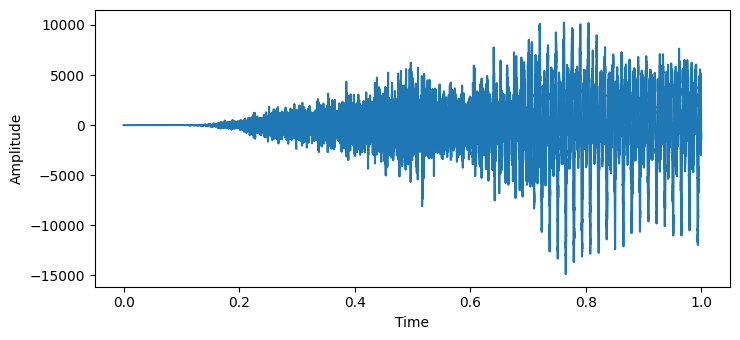

In [11]:
## plot 44100Hz to time

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read(SNORING_FILE  )
x_1 = np.linspace(0, 1, 44100)

audio = input_data[1]
plt.plot(x_1,audio[0:44100])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

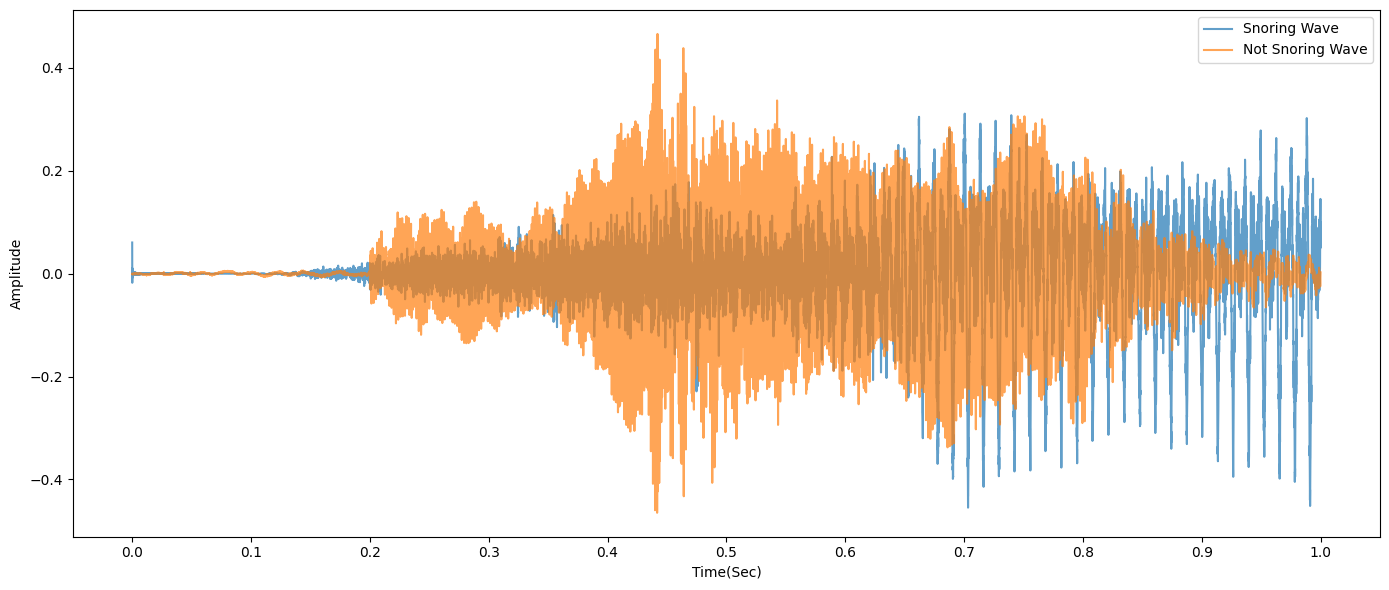

In [12]:
x = np.linspace(0, 1, 16000)
plt.figure(figsize=(14, 6))
plt.plot(x,wave, alpha=0.7)
plt.plot(x,nwave, alpha=0.7)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')
plt.legend(labels=['Snoring Wave', 'Not Snoring Wave'])
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [10]:
pos = tf.data.Dataset.list_files(SNORING_DATA_PATH+'/*.wav')
neg = tf.data.Dataset.list_files(NOT_SNORING_DATA_PATH+'/*.wav')

In [11]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [12]:
lengths = []
for file in os.listdir(os.path.join(NOT_SNORING_DATA_PATH)):
    tensor_wave = load_wav_16k_mono(os.path.join(NOT_SNORING_DATA_PATH, file))
    lengths.append(len(tensor_wave))

In [16]:
os.listdir(os.path.join(SNORING_DATA_PATH))

['1_0.wav',
 '1_1.wav',
 '1_10.wav',
 '1_100.wav',
 '1_101.wav',
 '1_102.wav',
 '1_103.wav',
 '1_104.wav',
 '1_105.wav',
 '1_106.wav',
 '1_107.wav',
 '1_108.wav',
 '1_109.wav',
 '1_11.wav',
 '1_110.wav',
 '1_111.wav',
 '1_112.wav',
 '1_113.wav',
 '1_114.wav',
 '1_115.wav',
 '1_116.wav',
 '1_117.wav',
 '1_118.wav',
 '1_119.wav',
 '1_12.wav',
 '1_120.wav',
 '1_121.wav',
 '1_122.wav',
 '1_123.wav',
 '1_124.wav',
 '1_125.wav',
 '1_126.wav',
 '1_127.wav',
 '1_128.wav',
 '1_129.wav',
 '1_13.wav',
 '1_130.wav',
 '1_131.wav',
 '1_132.wav',
 '1_133.wav',
 '1_134.wav',
 '1_135.wav',
 '1_136.wav',
 '1_137.wav',
 '1_138.wav',
 '1_139.wav',
 '1_14.wav',
 '1_140.wav',
 '1_141.wav',
 '1_142.wav',
 '1_143.wav',
 '1_144.wav',
 '1_145.wav',
 '1_146.wav',
 '1_147.wav',
 '1_148.wav',
 '1_149.wav',
 '1_15.wav',
 '1_150.wav',
 '1_151.wav',
 '1_152.wav',
 '1_153.wav',
 '1_154.wav',
 '1_155.wav',
 '1_156.wav',
 '1_157.wav',
 '1_158.wav',
 '1_159.wav',
 '1_16.wav',
 '1_160.wav',
 '1_161.wav',
 '1_162.wav',
 '1

In [17]:
lengths

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [18]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [13]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [20]:
wav = load_wav_16k_mono(filepath)
wav = wav[:16000]
wav

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([-0.10336659, -0.1914095 , -0.16203348, ...,  0.08253232,
        0.05625633,  0.0252252 ], dtype=float32)>

In [21]:
spectrogram, label = preprocess(filepath, label)

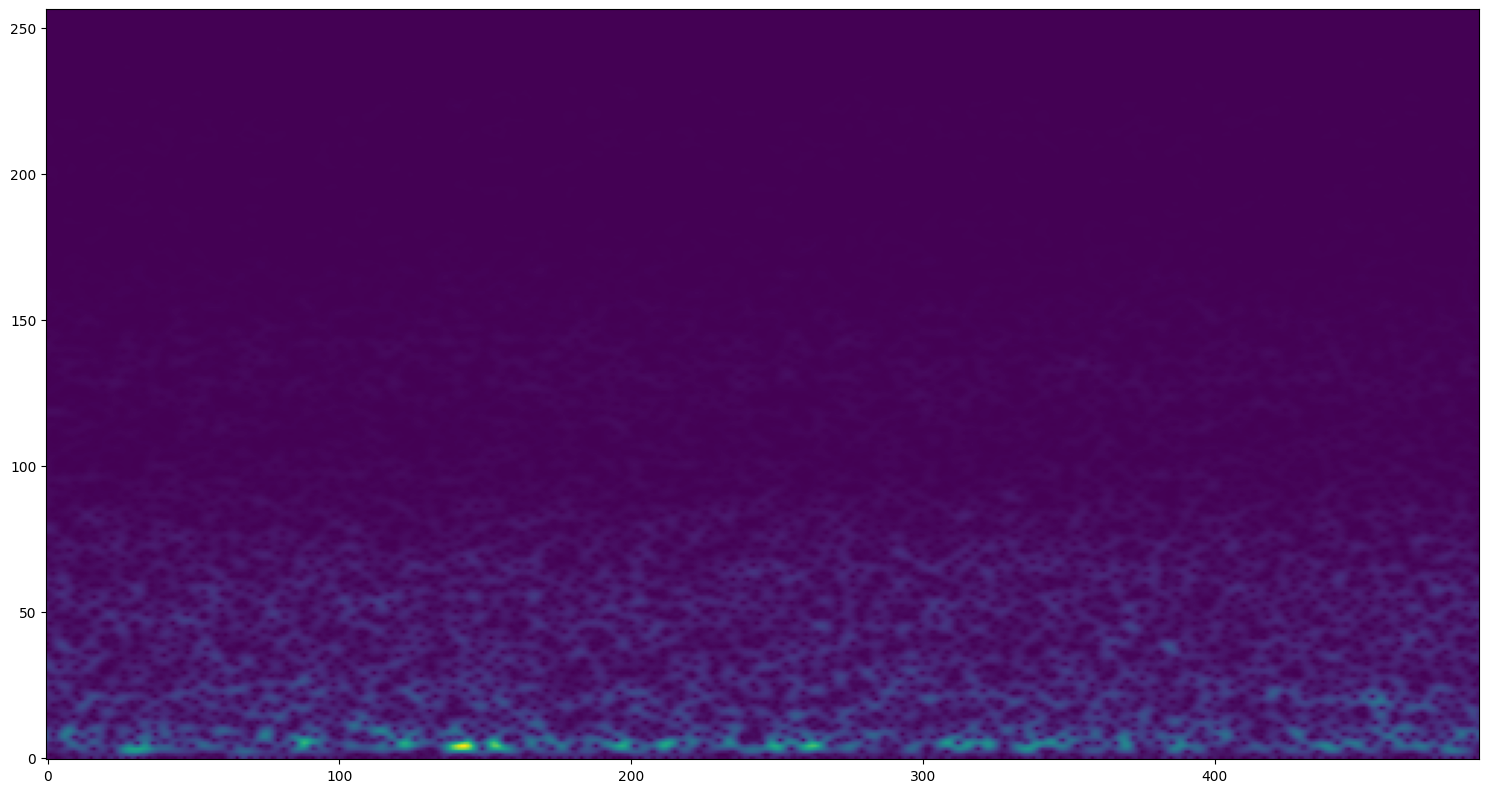

In [22]:
plt.figure(figsize=(15,8))
plt.imshow(tf.transpose(spectrogram)[0])
plt.gca().invert_yaxis()
plt.show()

In [14]:
data.as_numpy_iterator().next()

(b'D:\\python\\safevision\\Snoring_Dataset\\1\\1_444.wav', 1.0)

In [ ]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)

    sample_rate = tf.reduce_mean(sample_rate)

    sample_rate_float = tf.cast(sample_rate, tf.float32)

    sample_rate_int = tf.cast(sample_rate_float, tf.int32)

    condition = tf.equal(sample_rate_int, 16000)

    wav = tf.cond(condition, 
                  lambda: wav, 
                  lambda: tf.py_function(func=resample_wav, inp=[wav, sample_rate_int], Tout=tf.float32))

    return wav

def resample_wav(wav, sample_rate):
    num_samples = int(tf.shape(wav)[0] * 16000 / sample_rate)
    wav_numpy = wav.numpy()
    wav_resampled = scipy.signal.resample(wav_numpy, num_samples)
    return tf.convert_to_tensor(wav_resampled, dtype=tf.float32)

def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32) 
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)  
    return spectrogram, label


In [ ]:

processed_data = data.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

processed_data = processed_data.cache()
processed_data = processed_data.shuffle(buffer_size=1000)
processed_data = processed_data.batch(64)
processed_data = processed_data.prefetch(tf.data.experimental.AUTOTUNE)

In [126]:
len(processed_data)

16

In [127]:
train = processed_data.take(math.ceil(len(processed_data)*.7))
test = processed_data.skip(math.ceil(len(processed_data)*.7)).take(math.floor(len(processed_data)*.3))

In [128]:
samples, labels = train.as_numpy_iterator().next()

In [129]:
samples.shape

(64, 491, 257, 1)

In [130]:
input_shape = samples.shape[1:]
input_shape

(491, 257, 1)

In [131]:
#first model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [132]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [133]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 489, 255, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 487, 253, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 1971376)           0         
                                                                 
 dense (Dense)               (None, 128)               252336256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 252338865 (962.60 MB)
Trainable params: 252338865 (962.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
def vizual_model():
    from collections import defaultdict
    from PIL import ImageFont
    import visualkeras
    color_map = defaultdict(dict)
    color_map[Conv2D]['fill'] = 'orange'
    color_map[Dense]['fill'] = 'green'
    color_map[Flatten]['fill'] = 'teal'

    font = ImageFont.truetype("arial.ttf", 32)
    visualkeras.layered_view(model, to_file='../Arch.png', min_xy=100, min_z=100, scale_xy=100, scale_z=100, one_dim_orientation='x')


In [135]:
hist = model.fit(train, epochs=50, validation_data=test)

Epoch 1/50
12/12 [==============================] - 71s 6s/step - loss: 0.3070 - recall: 0.7735 - precision: 0.8994 - val_loss: 0.2065 - val_recall: 0.9266 - val_precision: 0.9712
Epoch 2/50
12/12 [==============================] - 68s 6s/step - loss: 0.1388 - recall: 0.9716 - precision: 0.9766 - val_loss: 0.0803 - val_recall: 0.9905 - val_precision: 1.0000
Epoch 3/50
12/12 [==============================] - 68s 6s/step - loss: 0.0846 - recall: 0.9897 - precision: 0.9974 - val_loss: 0.0362 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/50
12/12 [==============================] - 69s 6s/step - loss: 0.0277 - recall: 0.9948 - precision: 1.0000 - val_loss: 0.0140 - val_recall: 1.0000 - val_precision: 0.9907
Epoch 5/50
12/12 [==============================] - 68s 6s/step - loss: 0.0084 - recall: 0.9975 - precision: 1.0000 - val_loss: 0.0027 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 6/50
12/12 [==============================] - 65s 5s/step - loss: 0.0033 - recall: 1.0000 - pr

In [136]:
loss = 'loss'
val_loss = 'val_loss'
recall = 'recall'
val_recall = 'val_recall'
precision = 'precision'
val_precision = 'val_precision'

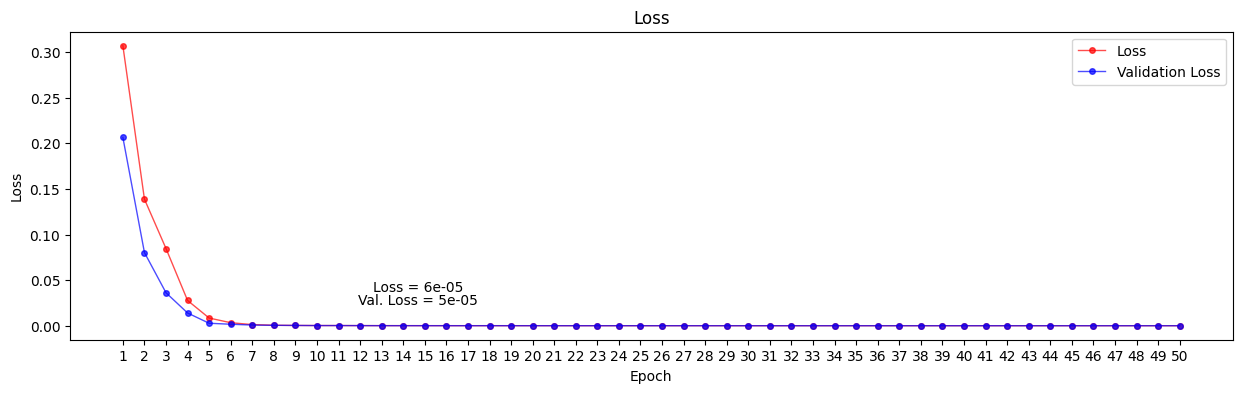

In [138]:
x_values = np.arange(1,51,1)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Loss')
plt.plot(x_values,hist.history[loss], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Loss',markersize=4)
plt.plot(x_values,hist.history[val_loss], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Loss',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[loss]
z = hist.history[loss]
val_z = hist.history[val_loss]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Loss = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-5, 25), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Loss = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-5, 15), ha='center',
                    textcoords='offset points')
    i=i+1 
plt.show()

In [139]:
model_name = 'my_h5_model_50e.h5'

In [140]:
tf.keras.models.save_model(model, './saved_models/' + model_name)

C:\Temp\ipykernel_17076\3395679041.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, './saved_models/' + model_name)


In [141]:
my_h5_saved_model = tf.keras.models.load_model(
    './saved_models/' + model_name)
model = my_h5_saved_model

In [142]:
X_test, y_test = test.as_numpy_iterator().next()

In [143]:
yhat_x_test = model.predict(X_test)

2/2 [==============================] - 1s 454ms/step


In [144]:
yhat_x_test = [1 if prediction > 0.5 else 0 for prediction in yhat_x_test]

In [145]:
yhat_x_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0]

In [146]:
y_test.astype(int)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [147]:
confusion_matrix(y_test.astype(int),yhat_x_test)

array([[32,  0],
       [ 0, 32]], dtype=int64)

In [19]:
from pydub import AudioSegment

# Загрузите WAV файл
audio = AudioSegment.from_wav("D:/python/safevision/hrap-mujskoy-prodoljitelnyiy.wav")

# Обрежьте до 1 секунды
trimmed_audio = audio[:1000]  # 1000 миллисекунд = 1 секунда

# Сохраните обрезанный аудиофайл
trimmed_audio.export("trimmed_output.wav", format="wav")


d:\python\safevision\.venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='trimmed_output.wav'>

In [20]:
def predict(file_path):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)

    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32) 
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    spectrogram = tf.expand_dims(spectrogram, axis=0)

    prediction = model.predict(spectrogram)
    return prediction

file_path = 'D:/python/safevision/trimmed_output.wav'
predicted_label = predict(file_path)

predict = 1 if predicted_label[0][0] > 0.5 else 0
# Вывод предсказания
print(f"Предсказанная метка: {predict}")

1/1 [==============================] - 1s 547ms/step
Предсказанная метка: 1


In [148]:
def load_mp3_16k_mono(filename):
    # Конвертируем MP3 в WAV формат
    audio = AudioSegment.from_mp3(filename)
    audio = audio.set_channels(1).set_frame_rate(16000)
    
    # Преобразуем WAV в массив numpy
    wav_data = np.array(audio.get_array_of_samples()).astype(np.float32)
    wav_data /= np.iinfo(audio.array_type).max  # Нормализуем

    # Конвертируем в тензор
    wav_tensor = tf.convert_to_tensor(wav_data, dtype=tf.float32)
    
    return wav_tensor

In [185]:
test_file_name = 'D:\python\safevision\sounds\zvuk-mujskogo-hrapa-mujchina-hrapit-24199.wav'
wav = load_mp3_16k_mono(test_file_name) 

In [186]:
#avg_power_of_signal = sum(wav**2)/len(wav)
SNR_dB = 3.5

SNR_linear = 10 ** SNR_dB / 10

if len(wav) > 16000:
    sequence_stride = 16000
else:
    sequence_stride = 16000-1
    
min_wav = 10000

In [187]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)

In [188]:
samples, index = audio_slices.as_numpy_iterator().next()

In [190]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([16000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [191]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [192]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

1/1 [==============================] - 1s 501ms/step


In [193]:
print(yhat)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]


In [194]:
from itertools import groupby
yhat_new = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat_new).numpy()

C:\Temp\ipykernel_17076\1824061900.py:24: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='red', alpha=0.2)
C:\Temp\ipykernel_17076\1824061900.py:20: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='green', alpha=0.2)


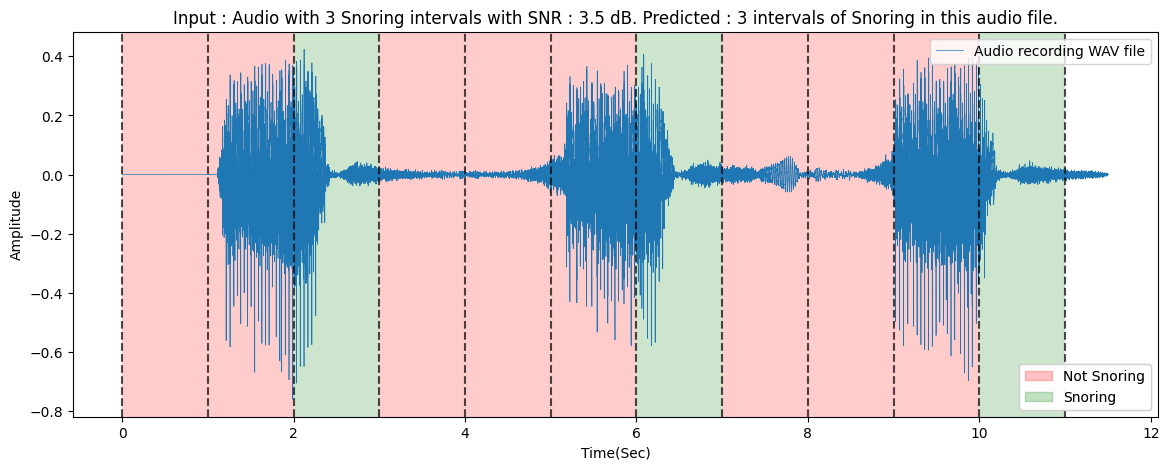

In [ ]:
import matplotlib.collections as collections
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (14,5)

x = np.linspace(0, len(wav)/16000, len(wav))
ax.plot(x,wav,linewidth=0.5)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')

for i in range(len(yhat)+1):
    x=i
    ax.axvline(x, color='black', linestyle='--',alpha=0.7)
    if i != len (yhat):
        yrange = (4*min_wav, -6*min_wav)
        xrange1 = [(i, 1)]
        color='red'
        if yhat[i]==1:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='green', alpha=0.2)
            ax.add_collection(c)
  
        else:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='red', alpha=0.2)
            ax.add_collection(c)

       
    
red_patch = mpatches.Patch(color='red', label='Not Snoring', alpha=0.2)
green_patch = mpatches.Patch(color='green', label='Snoring', alpha=0.2)

leg1 = ax.legend(labels=['Audio recording WAV file'], loc= 1)

leg2 = ax.legend(handles=[red_patch,green_patch], loc =4)
ax.add_artist(leg1)
ax.add_artist(leg2)
plt.title(f'Input : Audio with {calls} Snoring intervals with SNR : {SNR_dB} dB. Predicted : {calls} intervals of Snoring in this audio file.')
plt.show()